In [1]:
#-------------------------------------------------------------------------------
# Test the code on real data
#     In the 'Data' section, chose the name of the dataset of interest in
#   "data_name". The file must then be in data/$data_name.txt.
#   The results will then be stored in results/$data_name/$results_path/time_of_run
#     Set the parameters of the Gibbs sampler in the 'Set Parameters'
#   section. 
#-------------------------------------------------------------------------------

include("src/main.jl")
include("src/plot_tools.jl")

using ProgressBars
using HDF5, JLD
using DelimitedFiles
using Dates
using ProfileView
using Profile
using Distributions

Id = SparseArrays.I

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/ayedm/.julia/packages/PyPlot/4wzW1/src/init.jl:192


LinearAlgebra.UniformScaling{Bool}
true*I

In [40]:
alpha = 0.1
beta = 0.5

# Parameters
K_ = 5
n_list = [500, 1000, 1500]
r_alpha = 2.
v_alpha = 0.1

r_dist = Gamma(r_alpha, .5)
v_dist = Gamma(v_alpha, .5)

# Initializing variables
R_ = zeros(K_)
V_ = Affinity()
# Factorized adjacency matrix
Z_ = init_factorized(n_list[3], K_)

A = zeros(Int64, n_list[3], n_list[3])

for k in 1:K_
    R_[k] = rand(r_dist)
    V_[k] = rand(v_dist, n_list[3])
    # Construct adjacency matrix of community k
    Z_[k] = active_adjacency(R_[k], V_[k])
    
    A += Z_[k]
end

final_order, clusters = cluster_communities(R_, V_);

sparse_data = sparse(A);

In [67]:
# Data 3000
alpha = 0.1
beta = 0.5

# Parameters
K_ = 5
n_list = [3000]
r_alpha = 2.
v_alpha = 0.1

r_dist = Gamma(r_alpha, .5)
v_dist = Gamma(v_alpha, .5)

# Initializing variables
R_ = zeros(K_)
V_ = Affinity()
# Factorized adjacency matrix
Z_ = init_factorized(n_list[end], K_)

A = zeros(Int64, n_list[end], n_list[end])

for k in 1:K_
    R_[k] = rand(r_dist)
    V_[k] = rand(v_dist, n_list[end])
    # Construct adjacency matrix of community k
    Z_[k] = active_adjacency(R_[k], V_[k])
    
    A += Z_[k]
end

final_order, clusters = cluster_communities(R_, V_);

sparse_data = sparse(A);

In [68]:
nnz(sparse_data)

105465

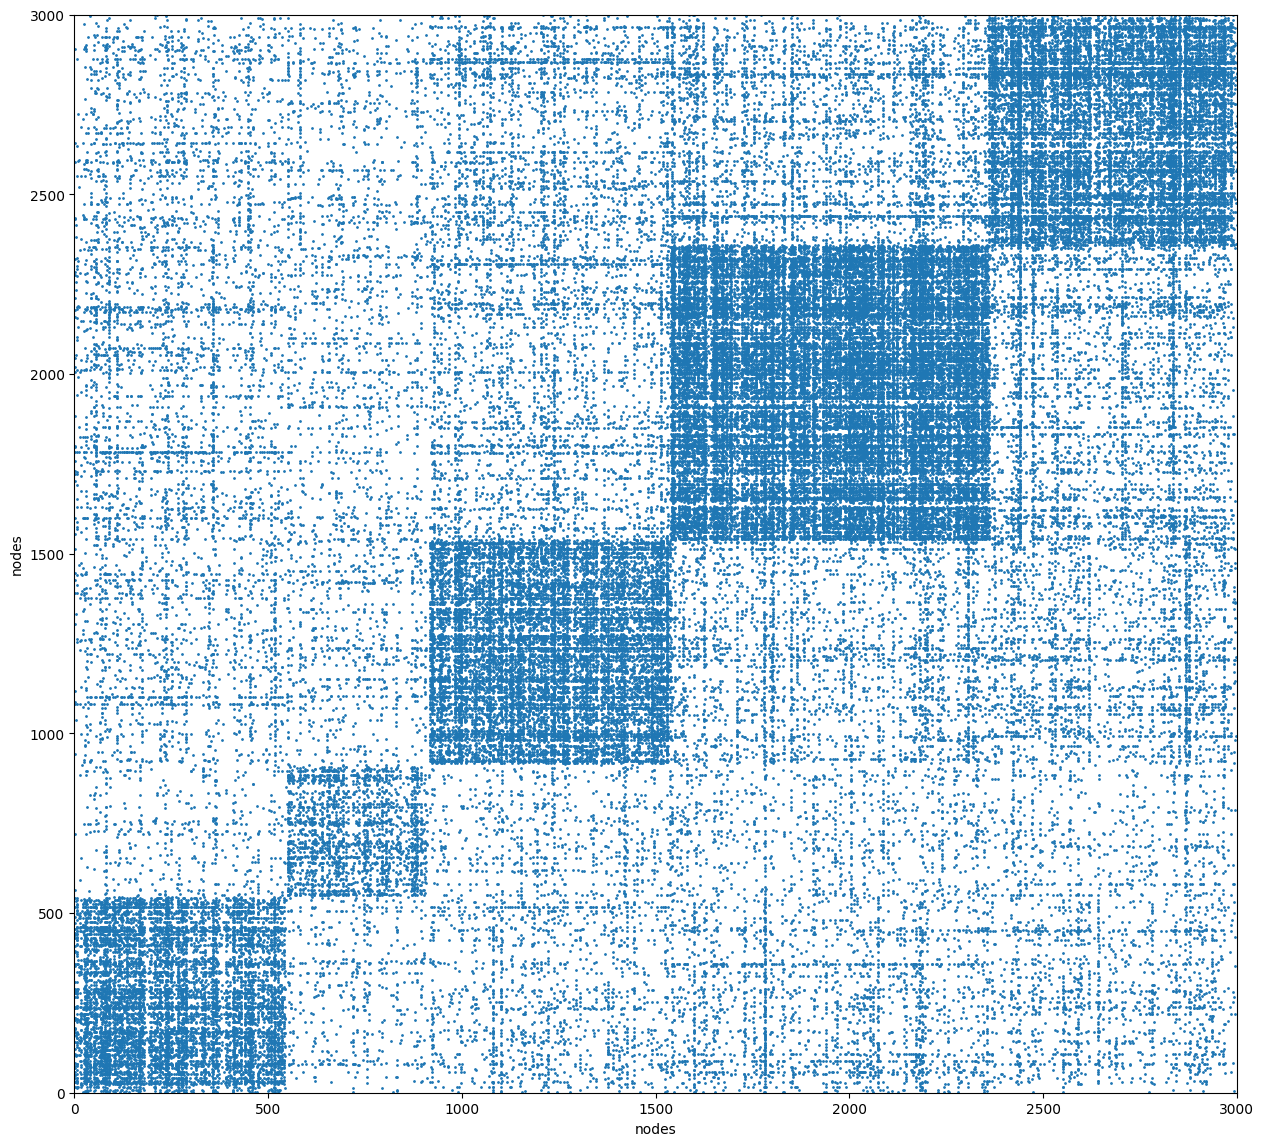

In [69]:
spy_sparse_order(sparse_data, final_order, save=false)

In [11]:
pwd()

"/Users/ayedm/Documents/community detect code/BNP_factorization_last"

In [29]:
#-------------------------------------------------------------------------------
# Save folder
#-------------------------------------------------------------------------------
# Path to the folder where to store the information
main_dir = pwd()
current_dir = "data/data_for_kn"
data_name = "data_for_kn"

# Saving main informations about the run in a txt file
println("Saving in "*current_dir)
println()
save_path = string(main_dir, "/", current_dir, '/')
mkpath(save_path)
open(save_path*"info.txt","w") do f
  write(f,"Dataset:\n")
  write(f,string("  name = ", data_name, "\n"))
  write(f,string("  number of nodes = ", n_list[3], "\n"))
  write(f,string("  number of edges = ", sum(sparse_data),"\n"))
  write(f,string("  directed = true","\n"))
  write(f,string("  weighted = true", "\n\n"))

  write(f,"Initial parameters:\n")
  write(f,string("  K = ", K_,"\n"))
  write(f,string("  r_alpha = ", r_alpha,"\n"))
  write(f,string("  r_beta = 0.5", "\n"))
  write(f,string("  v_alpha = ", v_alpha,"\n"))
  write(f,string("  v_beta = 0.5", "\n"))
end

# Saving the R_, V_ and subgraphs of the communities
save(save_path*"variables.jld", "R_", R_,
                                "V_", V_,
                                "Z_", V_,
                                "sparse_data", sparse_data)


Saving in data/data_for_kn



In [32]:
# Save datasets (small, medium, large)
n_s = n_list[1]
sp_data_small = sparse_data[1:n_s, 1:n_s]
I_,J_,Val_ = findnz(sp_data_small)
writedlm(string("data/", data_name, "_small.txt"), hcat(I_, J_, Val_))

n_s = n_list[2]
sp_data_small = sparse_data[1:n_s, 1:n_s]
I_,J_,Val_ = findnz(sp_data_small)
writedlm(string("data/", data_name, "_medium.txt"), hcat(I_, J_, Val_))

n_s = n_list[3]
sp_data_small = sparse_data[1:n_s, 1:n_s]
I_,J_,Val_ = findnz(sp_data_small)
writedlm(string("data/", data_name, "_large.txt"), hcat(I_, J_, Val_))

In [70]:
# Path to the folder where to store the information
main_dir = pwd()
current_dir = "data/data_for_kn"
data_name = "data_for_kn"

n_s = n_list[end]
sp_data_small = sparse_data[1:n_s, 1:n_s]
I_,J_,Val_ = findnz(sp_data_small)
writedlm(string("data/", data_name, "_very_large.txt"), hcat(I_, J_, Val_))